<a href="https://colab.research.google.com/github/Namanm23/Deep-Learning-Codes/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.3360 - val_loss: 0.1663
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.1584 - val_loss: 0.1354
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1331 - val_loss: 0.1234
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1232 - val_loss: 0.1167
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1167 - val_loss: 0.1122
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1131 - val_loss: 0.1098
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1103 - val_loss: 0.1075
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1078 - val_loss: 0.1047
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1054 - val_loss: 0.1026
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1034 - val_loss: 0.1006
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1015 - val_lo

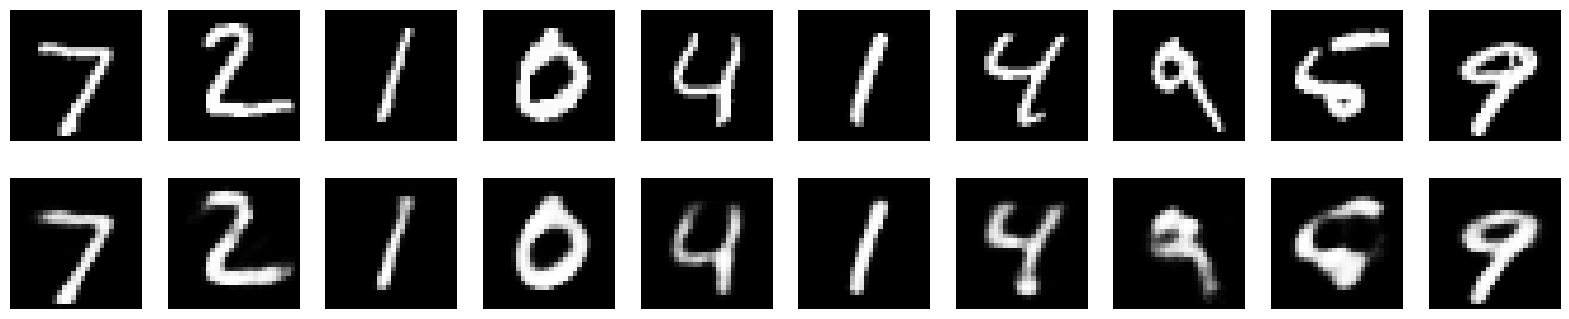

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Define Autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

# Plot original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.show()
